Time to analyse some data! 

As you might have already inferred, CMS Opendata is accessible in the form of .root files. Normally, .root files are analysed using a special analysis framework called ROOT, which requires Python or C++. ROOT is the scientific analysis framework that is used by most particle physicists to analyse CERN data. Until recently, it was the only way to open and analyse detector data. CERN detector data is released in the form of .root files, which can normally only be opened with ROOT using C++. A more recent version of ROOT, pyROOT, can be used with Python from the command line.

You can read the docs here : https://root.cern/

In Summer 2022, I worked with researchers at CERN and Fermilab to ensure CMS OpenData from 2015 can be analysed using Jupyter Notebooks for the first time since the CMS detector began operation 😃 The file we will be analysing today is one of the final outputs I generated at the end of my project.

### Importing dependencies

One of the major reasons why it was so hard for scientists to use sophisticated Python IDEs with CMS data was because of how it is formatted. There are some tools that make our analysis easy - Coffea, Uproot, Awkward Array, and Vector. You may have installed them already as part of the technical requirements for this programme. 

Detector data gets stored in large tables of numerical values. In Python, tables with purely numerical data are represented using arrays. However, we have one major problem - not all rows in our data are of the same length. Python simply does not know what to do with all the 'jagged' rows in the data when we ask it to perform mathematical operations. 

Awkward array lets us use Python to analyse 'jagged' data with NumPy. You can read the docs here : https://pypi.org/project/awkward/

Coffea is a very, very useful tool to analyse particle physics data. It allows us to open and read newer CMS files in Jupyter Notebooks. You can read the docs here : https://coffeateam.github.io/coffea/

Some of you may be familiar with NumPy, Python's most popular scientific computing package. You might also be familiar with Matplotlib, a popular library used for data visualisation. We will be using it for plotting our data.

In the below cell, we import some of these tools into our notebook. 


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

### Loading our data

The file we are analysing contains CMS OpenData from 2015, which means it was generated during Run 2 of the LHC. It is one of the final output files I generated as part of my work at Fermilab in 2022.

Unlike regular primary data, this file contains simulations. A lot of research takes place using collision data that is simulated using various methods and physics theories. The file we are using for analysis contains Drell-Yan simulation data. You can reaad more about Drell-Yan processes here : https://en.wikipedia.org/wiki/Drell%E2%80%93Yan_process

Let us now load our data sample into our notebook!

In [2]:
file = "nanoaod15_new.root"

### Loading events

Our .root file contains several 'events'. Each event corresponds to a collision. The following command lets us load our events. The file we are using stores the data in a very new 'NanoAOD' format, which allows us to store data more efficiently. This is why we need 'NanoEventsFactory' in order to read the data.

In [3]:
events = NanoEventsFactory.from_root(
    file, #our data file
    schemaclass = NanoAODSchema,
    metadata = {"dataset":"DYJets"},
).events()

/home/sneha/anaconda3/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnings.warn(
/home/sneha/anaconda3/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  warnings.warn(


### Looking at data!

What kinds of data does our file contain? The following command displays all the fields of data this file contains. You might recognise some of them! We can analyse each of these fields to extract information about the processes this data describes.

In [4]:
events.fields

['GenPart',
 'RawPuppiMET',
 'Muon',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'GenMET',
 'DeepMETResponseTune',
 'PSWeight',
 'fixedGridRhoFastjetAll',
 'SoftActivityJetNjets5',
 'Tau',
 'Jet',
 'CaloMET',
 'GenJet',
 'LHEPart',
 'Photon',
 'L1simulation',
 'Flag',
 'LHEScaleWeight',
 'SoftActivityJetHT',
 'ChsMET',
 'fixedGridRhoFastjetCentral',
 'SoftActivityJetNjets10',
 'HLT',
 'MET',
 'SoftActivityJet',
 'SV',
 'LHEPdfWeight',
 'LHEWeight',
 'SoftActivityJetHT10',
 'event',
 'DeepMETResolutionTune',
 'genWeight',
 'HTXS',
 'HLTriggerFinalPath',
 'GenDressedLepton',
 'PV',
 'GenIsolatedPhoton',
 'run',
 'GenVisTau',
 'GenJetAK8',
 'genTtbarId',
 'L1Reco',
 'LHEReweightingWeight',
 'fixedGridRhoFastjetCentralNeutral',
 'FsrPhoton',
 'TkMET',
 'OtherPV',
 'Electron',
 'FatJet',
 'luminosityBlock',
 'PuppiMET',
 'SoftActivityJetHT5',
 'LHE',
 'CorrT1METJet',
 'fixedGridRhoFastjetCentralCalo',
 'btagWeight',
 'Pileup',
 'RawMET',
 'HLTriggerFirstPath',
 'SoftActivityJetHT2',
 'Soft

Now, you might have picked a field you want to analyse. Each of these fields have several subfields of data we can look at. Today, we will be looking at muons. Let us take a closer look at the muon parameters that are in this file.

In [22]:
events.Muon.fields

['dxy',
 'dxyErr',
 'dxybs',
 'dz',
 'dzErr',
 'eta',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'pfRelIso04_all',
 'phi',
 'pt',
 'ptErr',
 'segmentComp',
 'sip3d',
 'softMva',
 'tkRelIso',
 'tunepRelPt',
 'mvaLowPt',
 'mvaTTH',
 'charge',
 'jetIdx',
 'nStations',
 'nTrackerLayers',
 'pdgId',
 'tightCharge',
 'fsrPhotonIdx',
 'highPtId',
 'highPurity',
 'inTimeMuon',
 'isGlobal',
 'isPFcand',
 'isStandalone',
 'isTracker',
 'jetNDauCharged',
 'looseId',
 'mediumId',
 'mediumPromptId',
 'miniIsoId',
 'multiIsoId',
 'mvaId',
 'mvaLowPtId',
 'pfIsoId',
 'puppiIsoId',
 'softId',
 'softMvaId',
 'tightId',
 'tkIsoId',
 'triggerIdLoose',
 'genPartIdx',
 'genPartFlav',
 'cleanmask',
 'fsrPhotonIdxG',
 'genPartIdxG',
 'jetIdxG']

### Examining parameters and plotting!

As you can see from the output of the previous cell, you can see the mass, charge and other parameters of the muons in this data sample. Let us start by examining a simple enough parameter, the charge of muons. In the following cell, we select the events which include exactly 2 muons (a dimuon event). Then, we look at the charge of the muons in these events.

In [23]:
muonevents = events[ak.num(events.Muon) == 2]
muon = muonevents.Muon
muon.charge 

<Array [[-1, 1], [1, -1], ... [-1, 1], [1, -1]] type='5699 * var * int32[paramet...'>

Look at the output from the previous cell. Notice that each of the elements in the array is another array with two elements. Each of these two elements correspond to one of the two muons in the dimuon event. Note that each event has a muon and an antimuon (positively charged muon).

Let us repeat this for events with a single muon.

In [26]:
muonevents = events[ak.num(events.Muon) == 1]
muon = muonevents.Muon
muon.charge

<Array [[-1], [1], [1], ... [1], [1], [-1]] type='5510 * var * int32[parameters=...'>

Let us now plot the number of muons and antimuons in single muon events in this file. The following commands use matplotlib.pyplot to plot this.

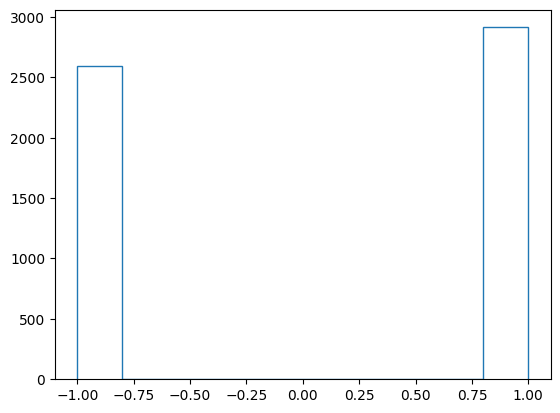

In [27]:
fig, ax = plt.subplots()
ax.hist(muon.charge, histtype="step")
plt.show()

There seem to be more events with antimuons (positively charged) than there are events with muons (negatively charged)!

What do you think the mass of a single muon is? Let us find out by looking at the mass parameter the same way we looked at the charge of muons.

In [26]:
muonevents = events[ak.num(events.Muon) == 1]
muon = muonevents.Muon
muon.mass 

<Array [[0.106], [0.106], ... [0.106], [0.106]] type='5510 * var * float32[param...'>

Close to expectation, the mass of a muon is shown to be 0.106 GeV, or 106 MeV. (Giga = 10^9, Mega = 10^6)

The mass of a single muon is agreed to be 105.66 MeV.

### A closer look at dimuon events

Now, let us take a closer look at what happens to mass in dimuon events. Remember that these are events/collisions where two muons are involved. In the following cell, we inspect the mass of the muons in dimuon events.

In [29]:
dimuonevents = events[ak.num(events.Muon) == 2]
dimuon = dimuonevents.Muon[:, 0] + dimuonevents.Muon[:, 1] #adds momenta of particles together 
dimuon.mass #invariant mass of system of two particles - system of particles = 2 muons
#the output of this cell will tell us the mass of the system of 2 muons in the dimuon system.


<Array [90.7, 108, 86.5, ... 91.5, 93.6, 76.1] type='5699 * float32'>

Let us now plot this spectrum of dimuon mass!

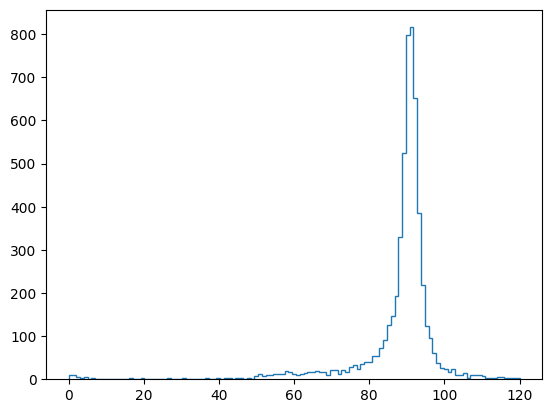

In [29]:
fig, ax = plt.subplots()
ax.hist(dimuon.mass, histtype="step", bins=np.linspace(0,120,120))
plt.show()

### Dimuon mass spectrum - what does it mean?

The spectrum of dimuon mass has a peak at about 90 GeV for this data set. Note that this peak is at a very different mass than the sum of masses of two muons. This peak corresponds to a very special resonance where a Z boson decays into a muon and an antimuon. 

The full mass spectrum of dimuon events in larger datasets will contain several other peaks to represent other particles decaying into a similar muon and antimuon pair. Here is a link to a plot on a logarithmic scale showing the other peaks : https://twiki.cern.ch/twiki/pub/CMSPublic/HLTDiMuon2017and2018/CMS_HLT_DimuonMass_Inclusive_2017.png

You can see that our peak corresponds to the Z peak on this plot! 

You can read more about the decay of Z bosons over here : https://atlas.physicsmasterclasses.org/en/zpath_lhcphysics2.htm